In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing Data

In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=train.drop(["label"],axis=1).values
Y=train[["label"]].values

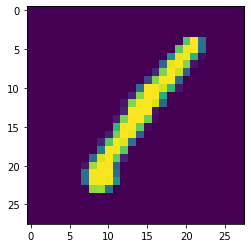

In [4]:
plt.imshow(X[0].reshape([28,28]))

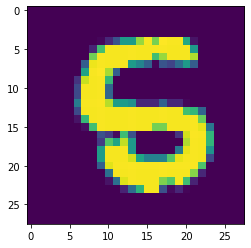

In [5]:
plt.imshow(X[19].reshape([28,28]))

In [6]:
X=X[:3001]    ### Only select limited observation forn anlaysis
Y=Y[:3001]
print(X.shape)
print(Y.shape)

(3001, 784)
(3001, 1)


In [7]:
X=X/255

### Train and Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 14)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2550, 784)
(2550, 1)
(451, 784)
(451, 1)


## Decision tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 8, random_state = 14)
dt_classifier.fit(x_train,y_train)
pred_train = dt_classifier.predict(x_train)
pred_test = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

Training Accuracy : 0.9450980392156862
Testing Accuracy : 0.7339246119733924


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',max_depth = 10, random_state =14)
rf_classifier.fit(x_train, y_train)
pred_train = rf_classifier.predict(x_train)
pred_test = rf_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Accuracy : 0.9952941176470588
Testing Accuracy : 0.8802660753880266


## Xgboost Algorithm

In [12]:
import xgboost as xgb
xg_classifier =xgb.XGBClassifier(n_estimators =5)
xg_classifier.fit(x_train, y_train)
pred_train = xg_classifier.predict(x_train)
pred_test = xg_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:07:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9878431372549019
Testing Accuracy : 0.8869179600886918


## lightgbm Algorithm

In [13]:
import lightgbm as lgb
lg_classifier=lgb.LGBMClassifier(min_child_samples=10)
lg_classifier.fit(x_train, y_train)
pred_train = lg_classifier.predict(x_train)
pred_test = lg_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Accuracy : 1.0
Testing Accuracy : 0.9334811529933481


## Voting Classifier  (Stacking)

In [14]:
from sklearn.ensemble import VotingClassifier
vt_classifier =VotingClassifier(estimators=[("dt",dt_classifier),("rf",rf_classifier),("xgb",xg_classifier)
                                           ,("lgbm",lg_classifier)],voting='hard')
vt_classifier.fit(x_train, y_train)
pred_train = vt_classifier.predict(x_train)
pred_test = vt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy :", accuracy_score(pred_train,y_train))
print("Testing Accuracy :", accuracy_score(pred_test,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 0.9976470588235294
Testing Accuracy : 0.9068736141906873


## Submission for Test data 

In [15]:
pred = lg_classifier.predict(test)
pred_df = pd.DataFrame({'ImageId' : [i for i in range(1, len(pred) + 1)], 'Label' : pred})
pred_df.to_csv('submission.csv', header=True, index=False)